# Real numbers walk

In this notebook I present my pyhton implementation of a way to visualize real numbers. The inspiration came from [this post](https://www.visualcinnamon.com/2015/01/exploring-art-hidden-in-pi.html) from Visual Cinamon where they made quite insteresting plots with R about the number π.

For a more mathematical reading you should see [this article](https://www.carma.newcastle.edu.au/jon/numtools.pdf) from Artacho et. al. (2012).


The main idea is to generate a 2D path plot based on the decimals of a real number. In this notebook I'll work only with some famous irrational numbers.

---
#### Created by
**Rennan Danilo Seimetz Chagas** <br>
Industrial Engineer & Optimization <br>
email: chagasrennan@gmail.com 

## Import packages

We will need some python packages to work with the numbers and plot the paths

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Transforming numbers into directions

Lets assume that our path allways starts at (0,0) and it follows the direction corresponding to the next digit. For that, we need to build a compass rose with the 10 base numbers (from 0 to 9). Each number designates a direction on this rose.

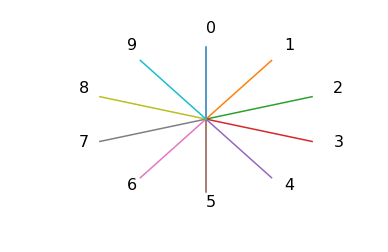

In [2]:
for i in range(10):
    x = [0,np.sin((pi*2)*(i/10))]
    y = [0,np.cos((pi*2)*(i/10))]
    plt.plot(x,y)
    plt.axis([-1.5, 1.5, -1.5, 1.5])
    plt.axis('off')
    plt.annotate(str(i), xy=(1.2*np.sin((pi*2)*(i/10)),1.2*np.cos((pi*2)*(i/10))), fontsize=16)

## Number π example

Lets start to play with this direction using a small number (10) of π decimals

π = 3.1415926535

In [3]:
mypi = '3.1415926535'

mypi.split('.').pop(1) # get only decimals

'1415926535'

In [4]:
number = mypi.split('.').pop(1) # get only decimals

# Path starts at (0,0)
# lx is a list of x axis points
# ly is a list of y axis points
lx, ly = [0],[0]

# Add new points to path
for i in number:
    lx.append(lx[-1] + np.sin((pi*2)*(int(i)/10)))
    ly.append(ly[-1] + np.cos((pi*2)*(int(i)/10)))

# print pair of points
for x,y in zip(lx,ly):
    print('(',x,',',y, ')')

( 0 , 0 )
( 0.5877852522924731 , 0.8090169943749475 )
( 1.1755705045849463 , 1.1102230246251565e-16 )
( 1.7633557568774194 , 0.8090169943749476 )
( 1.7633557568774196 , -0.19098300562505244 )
( 1.1755705045849463 , 0.6180339887498949 )
( 2.1266270208801 , 0.9270509831248424 )
( 1.538841768587627 , 0.1180339887498949 )
( 1.5388417685876272 , -0.8819660112501051 )
( 2.4898982848827806 , -1.1909830056250525 )
( 2.4898982848827806 , -2.1909830056250525 )


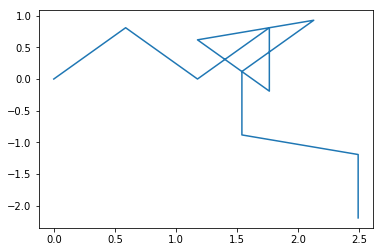

In [5]:
# plot path
plt.plot(lx,ly)

### Now, I'll try the same plot as above, but with 100 decimals of π and some colors

Text(5.118553845478449, 4.281152949374526, '100 decimals of π')

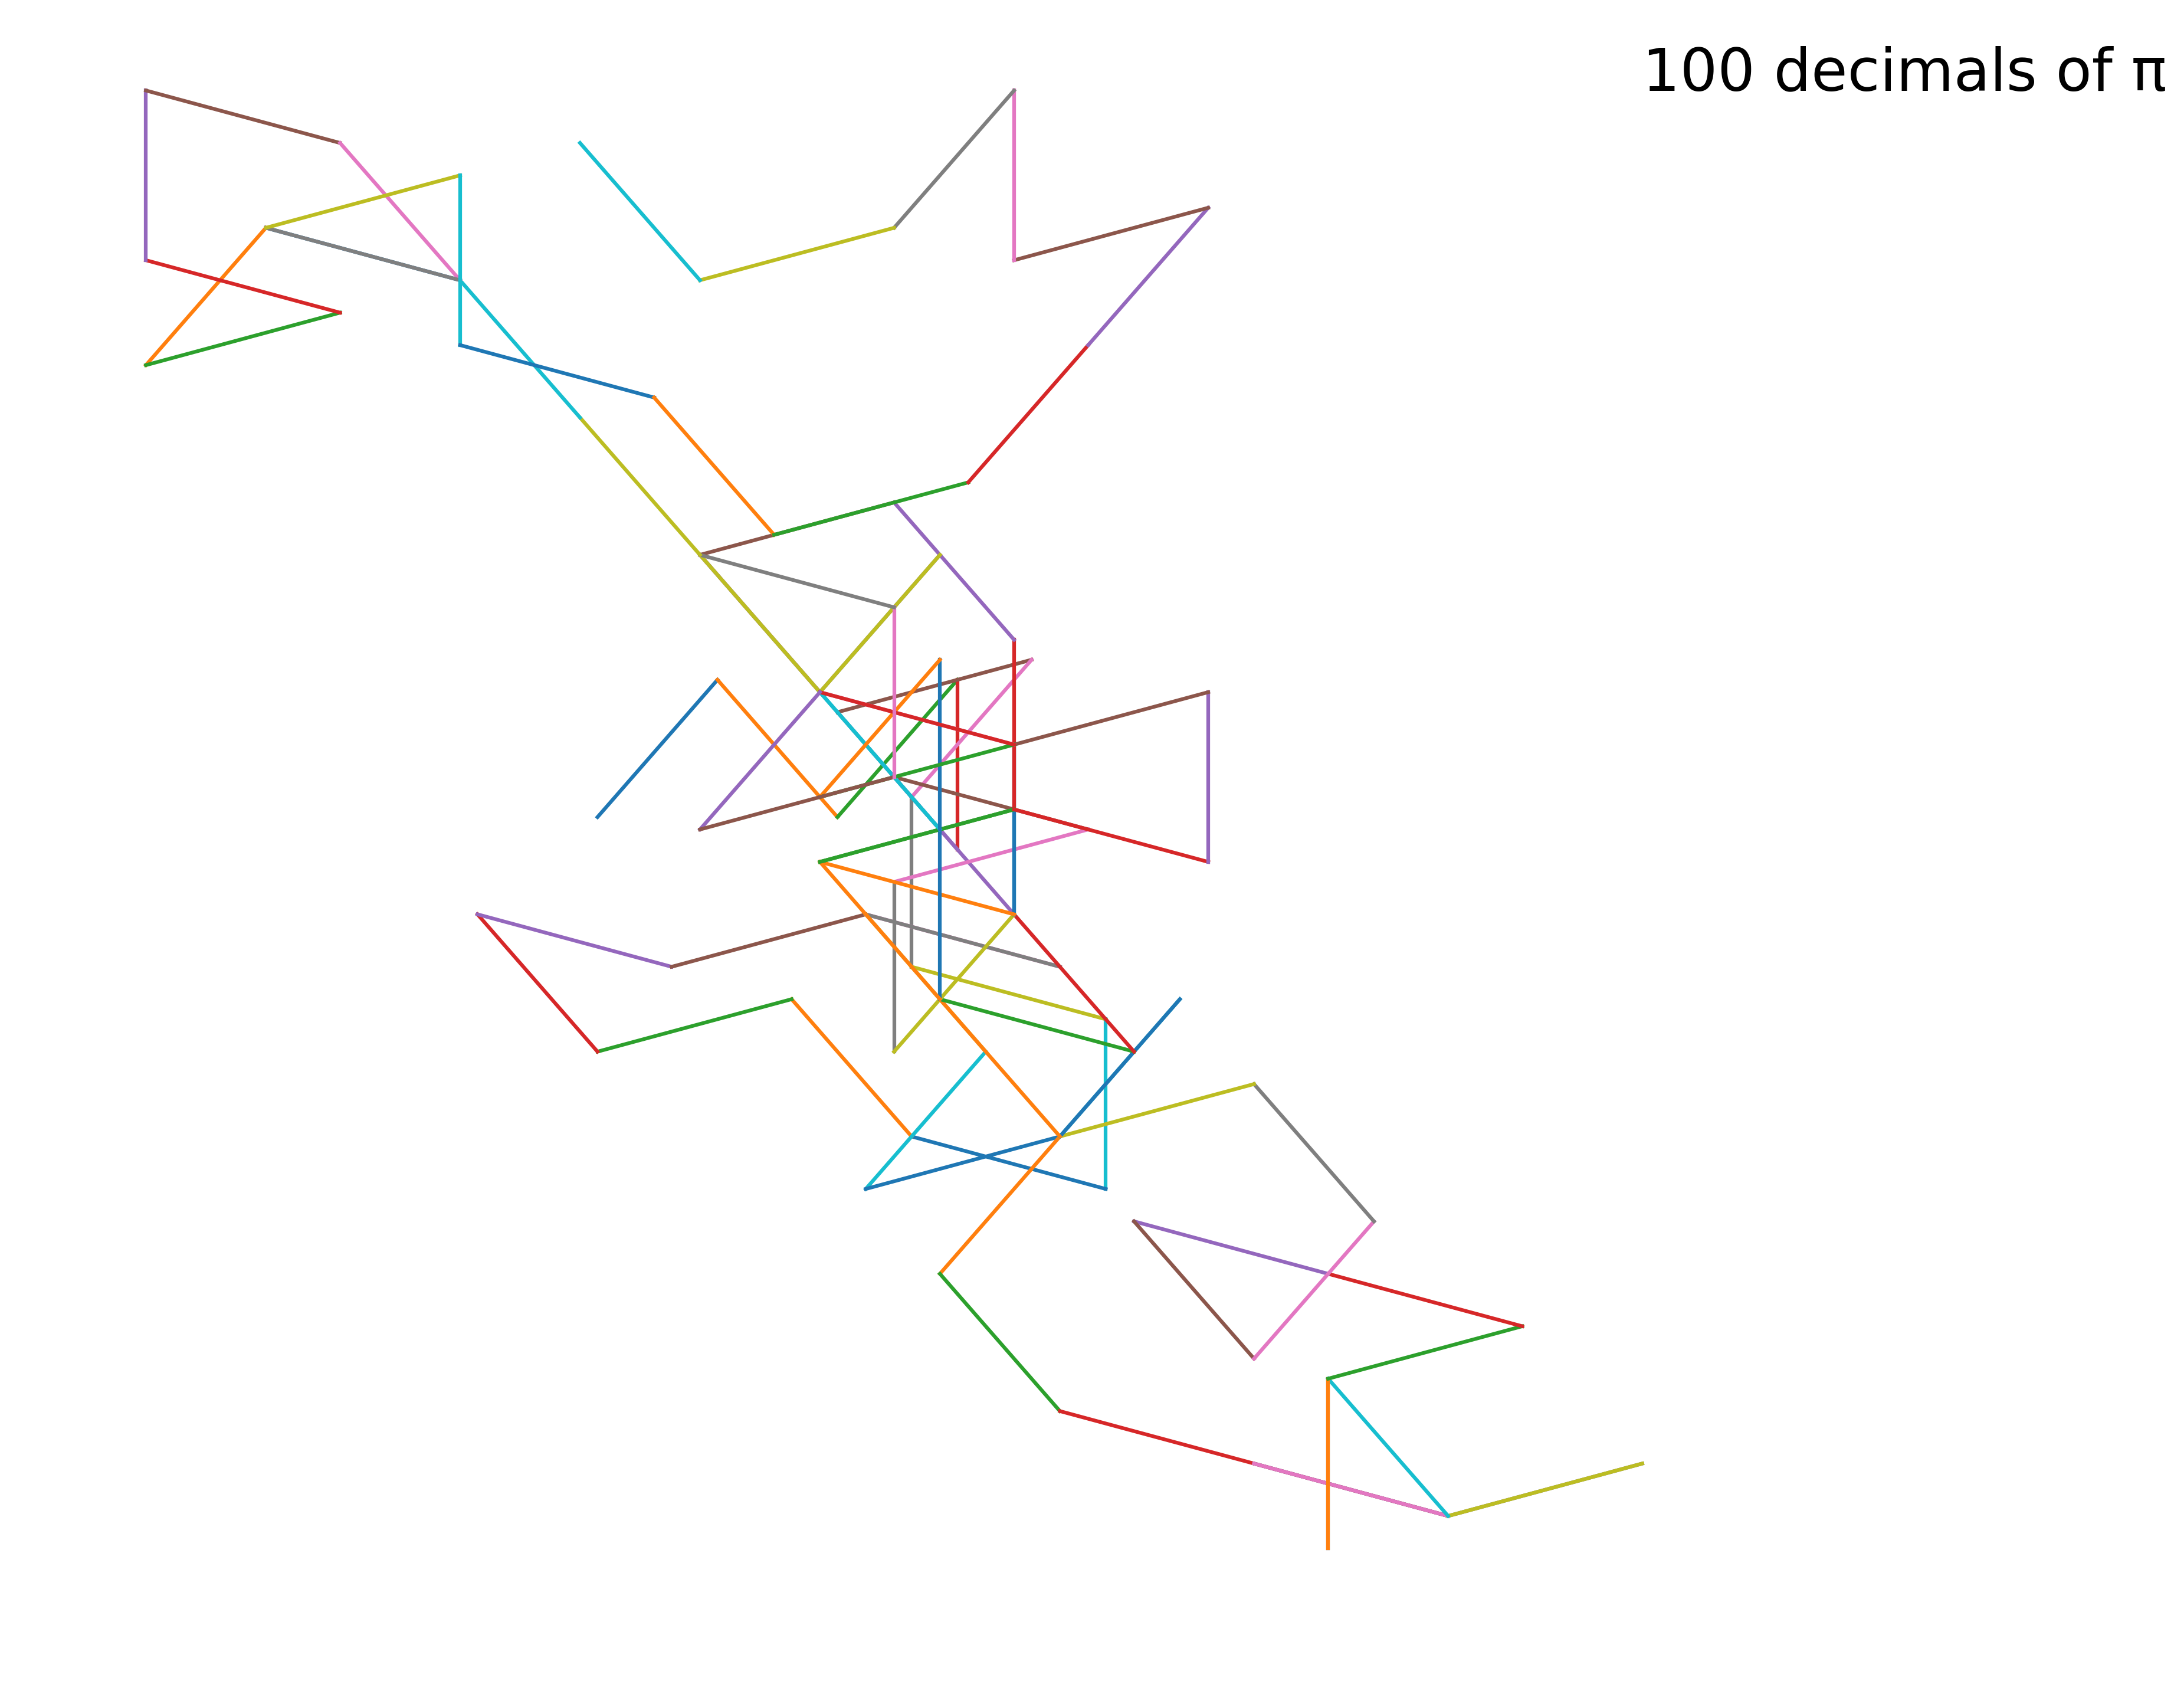

In [6]:
# 100 decimals
mypi = '3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679'

number = mypi.split('.').pop(1) # get only decimals

# Path starts at (0,0)
# lx is a list of x axis points
# ly is a list of y axis points
lx, ly = [0],[0]

# Add new points to path
for i in number:
    lx.append(lx[-1] + np.sin((pi*2)*(int(i)/10)))
    ly.append(ly[-1] + np.cos((pi*2)*(int(i)/10)))
    
plt.figure(figsize=(12,12),dpi=300) # bigger plot with high dpi
plt.axis('off') # remove chart axis

# repeat the plot to get some colors
for i in range(1,len(lx)):
    plt.plot([lx[i-1],lx[i]],[ly[i-1],ly[i]])
    
plt.annotate('100 decimals of π', xy=(max(lx),max(ly)), fontsize=24)

### Now that we have a basic method, I'll create a function to plot a beautifull representation of a walk provided for any real number. 


```python
def pathplot(number, name)
```
    get the number and the name (optional) and returns a jet colormap path with dark background


In [7]:
def pathplot(number, name=None):
    from cycler import cycler
    
    number = number.split('.').pop(1) # get only decimals
    
    # Path starts at (0,0)
    lx, ly = [0],[0]
    
    # Add new points to path
    for i in number:
        lx.append(lx[-1] + np.sin((pi*2)*(int(i)/10)))
        ly.append(ly[-1] + np.cos((pi*2)*(int(i)/10)))

    plt.figure(figsize=(12,12),dpi=300, facecolor='k')
    plt.axis('off')

    # Set color map for plot
    colormap = plt.cm.jet
    plt.gca().set_prop_cycle(cycler('color',[colormap(i) for i in np.linspace(0, 0.9, len(lx))]))

    # Plot segments
    for i in range(1,len(lx)):
        plt.plot([lx[i-1],lx[i]],[ly[i-1],ly[i]])
    
    # add number name to title if given
    title = str(len(number)) +' decimals'
    if name != None: 
        title = title + ' of '+ str(name)
    
    hfont = {'family': 'serif'}
    plt.annotate(title, xy=(max(lx),max(ly)), fontsize=24, color='white', **hfont)

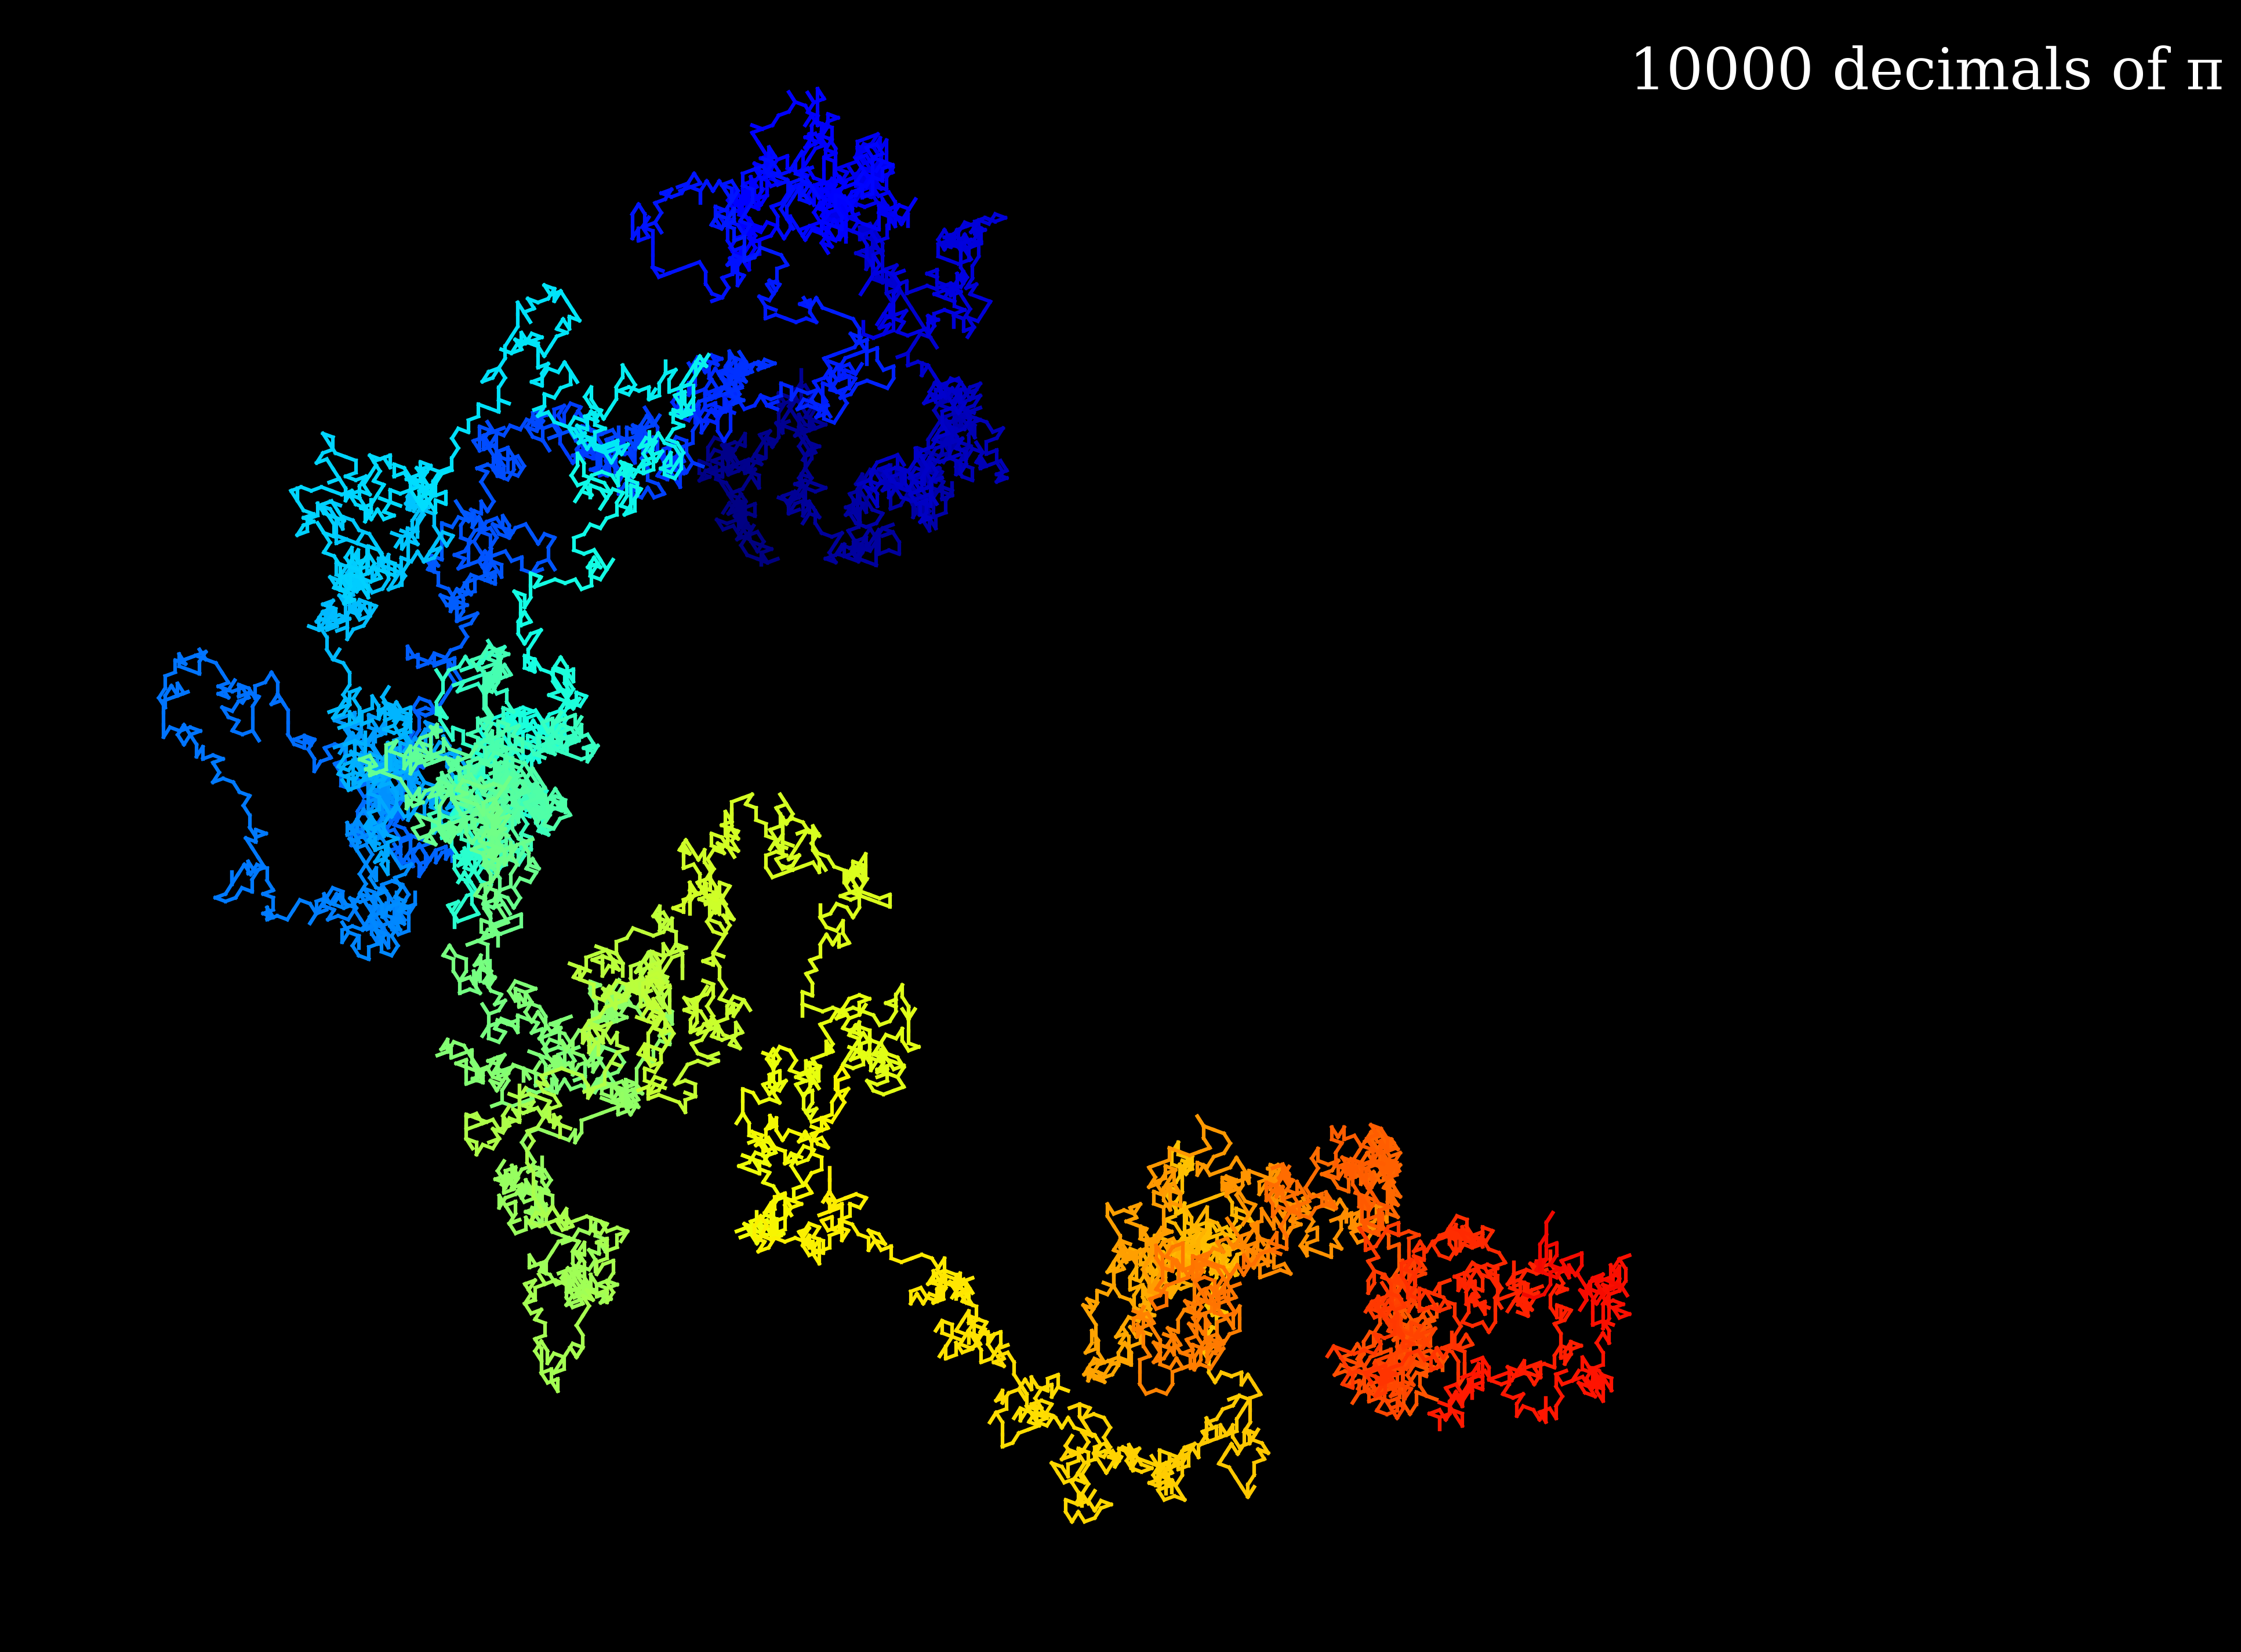

In [10]:
# Number pi
# 100 decimals
short_pi = open('short_pi.txt').readline()
# 1,000 decimals
medium_pi = open('medium_pi.txt').readline()
# 10,000 decimals
large_pi = open('large_pi.txt').readline()

pathplot(large_pi, 'π')

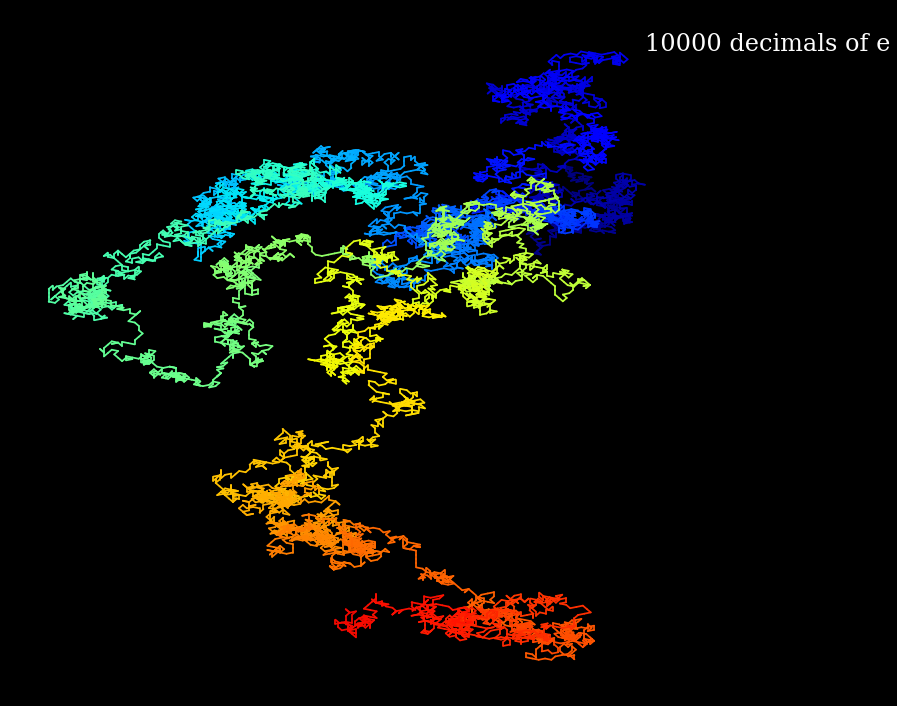

In [90]:
# Number e
# 10,000 decimals
large_e = open('large_e.txt').readline()

pathplot(large_e, 'e')

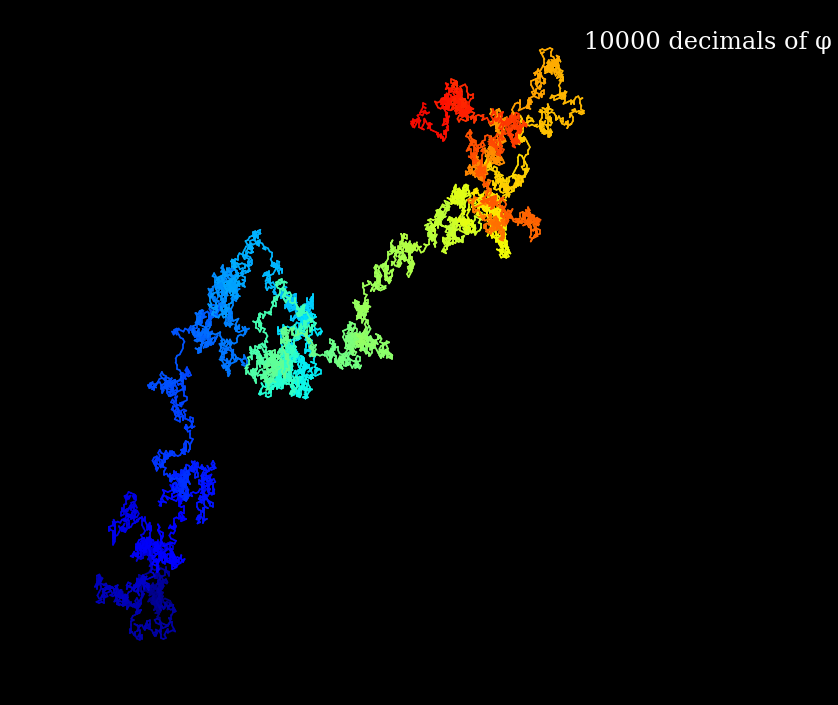

In [92]:
# Number phi
# 10,000 decimals
large_phi = open('large_phi.txt').readline()

pathplot(large_phi, 'φ')

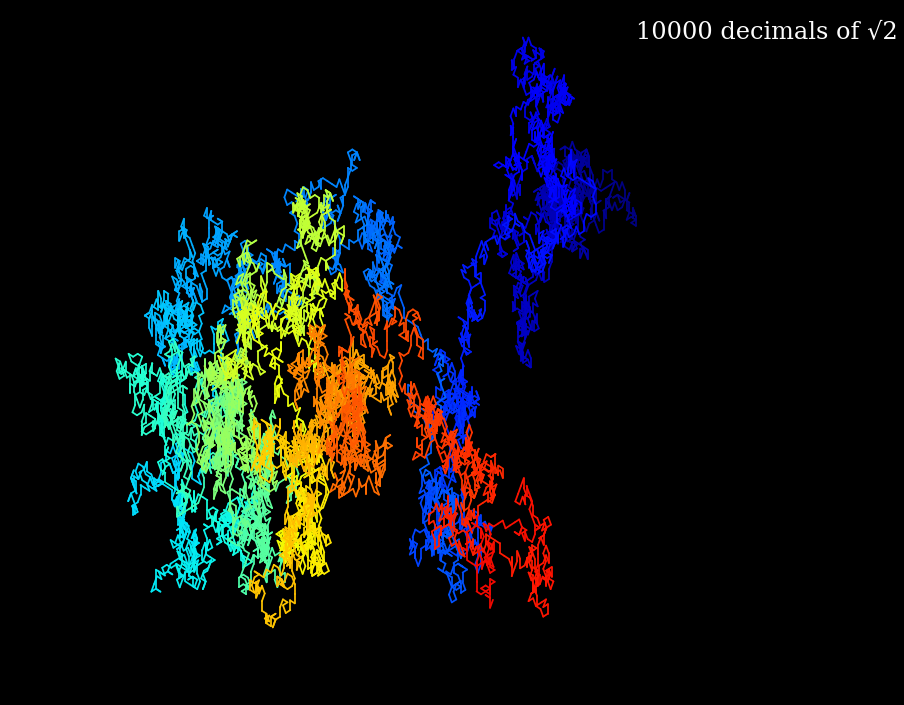

In [93]:
# Number √2
# 10,000 decimals
large_sqr = open('large_sqr.txt').readline()

pathplot(large_sqr, '√2')

## Animations with turtle

As an extra, check below a small code using turtle from python STL to plot a nice animation of the path.

In [65]:
import turtle

turtle.speed('fastest')
walk = [lx,ly]
for x,y in zip(*walk):
    turtle.goto(x*10,y*10)

turtle.exitonclick()